Importing all libraries and functions

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import scipy.stats as stats

Read the df from .csv file

In [20]:
df = pd.read_csv("exam.csv")
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,157,62.0,70.0,1.025,3.0,0.0,normal,abnormal,notpresent,notpresent,...,39.0,7900,3.9,yes,yes,no,good,no,no,ckd
1,109,54.0,70.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,no,yes,no,good,no,no,ckd
2,17,47.0,80.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,yes,no,no,poor,no,no,ckd
3,347,43.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,43.0,7200,5.5,no,no,no,good,no,no,notckd
4,24,42.0,100.0,1.015,4.0,0.0,normal,abnormal,notpresent,present,...,39.0,8300,4.6,yes,no,no,poor,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,71,46.0,60.0,1.010,1.0,0.0,normal,normal,notpresent,notpresent,...,28.0,14600,3.2,yes,yes,no,good,no,no,ckd
276,106,50.0,90.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,17.0,6500,NaN,yes,yes,no,good,yes,yes,ckd
277,270,23.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,41.0,7200,5.0,no,no,no,good,no,no,notckd
278,348,38.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,44.0,7300,6.4,no,no,no,good,no,no,notckd


Representing NaN values from string columns as '0'

In [21]:
s = (df.dtypes == 'object')
object_cols = list(s[s].index)
df[object_cols]=df[object_cols].fillna('0')

Transforming string columns to numeric

In [22]:
oe = preprocessing.OrdinalEncoder()
df[object_cols]=oe.fit_transform(df[object_cols])

Representing the correlation table to choose the columns with the biggest impact on 'classification' for further use

<AxesSubplot:>

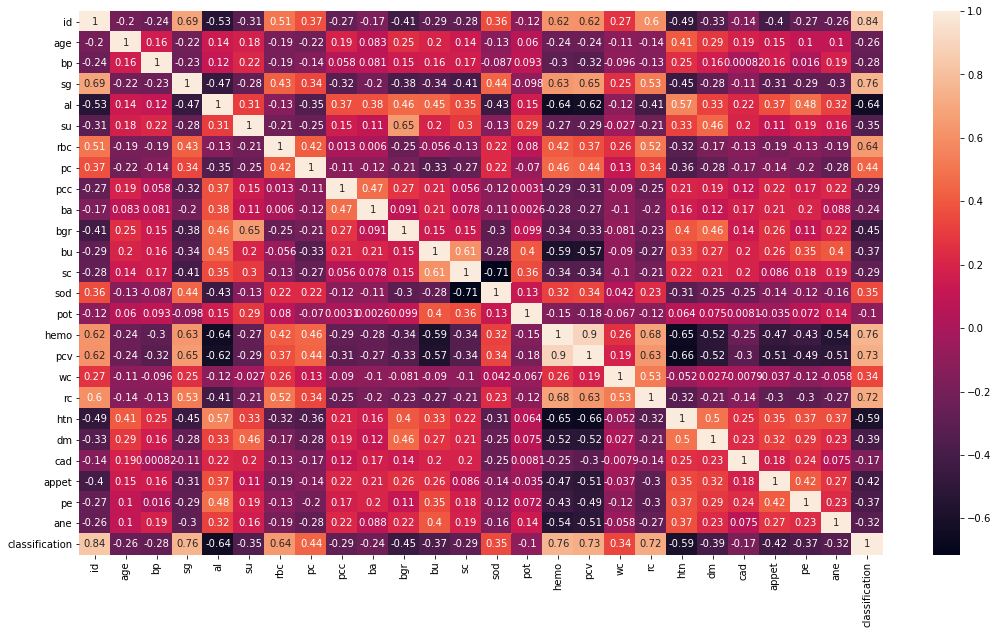

In [23]:
figure = plt.figure(figsize=(18, 10))
sns.heatmap(df.corr(), annot=True)

Plotting the boxplot for the column with the biggest correlation

<AxesSubplot:xlabel='hemo'>

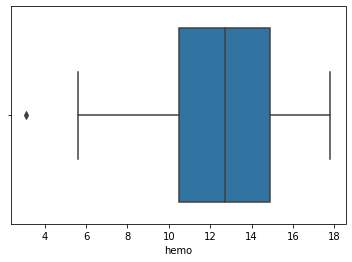

In [24]:
sns.boxplot(x=df['hemo'])

In [25]:
print(np.where(df['hemo']<4))

(array([128], dtype=int64),)


In [26]:
df=df.drop(128, axis=0)

Splitting train test data

In [27]:
X=df.drop('classification', axis=1).drop('id', axis=1)
y=df['classification']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Substituting NaN values from numerical columns with MICE imputation

In [28]:
lr=LinearRegression()
imp = IterativeImputer(estimator=lr,missing_values=np.nan, max_iter=40, verbose=2, imputation_order='roman',random_state=0)
X_train=imp.fit_transform(X_train)
X_test=imp.transform(X_test)

[IterativeImputer] Completing matrix with shape (223, 24)
[IterativeImputer] Ending imputation round 1/40, elapsed time 0.03
[IterativeImputer] Change: 151.2130951369861, scaled tolerance: 0.49 
[IterativeImputer] Ending imputation round 2/40, elapsed time 0.05
[IterativeImputer] Change: 28.929724175628692, scaled tolerance: 0.49 
[IterativeImputer] Ending imputation round 3/40, elapsed time 0.06
[IterativeImputer] Change: 16.415620556940482, scaled tolerance: 0.49 
[IterativeImputer] Ending imputation round 4/40, elapsed time 0.10
[IterativeImputer] Change: 12.603011423614745, scaled tolerance: 0.49 
[IterativeImputer] Ending imputation round 5/40, elapsed time 0.12
[IterativeImputer] Change: 9.616616865726819, scaled tolerance: 0.49 
[IterativeImputer] Ending imputation round 6/40, elapsed time 0.13
[IterativeImputer] Change: 7.291915878173121, scaled tolerance: 0.49 
[IterativeImputer] Ending imputation round 7/40, elapsed time 0.16
[IterativeImputer] Change: 5.491872371667597, scal

Changing the numpy array back to DataFrame

In [29]:
X_train = pd.DataFrame (X_train, columns= ['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane'])
X_test  = pd.DataFrame (X_test, columns=  ['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane'])

We do not have unbalanced data, as we can see in the plot below

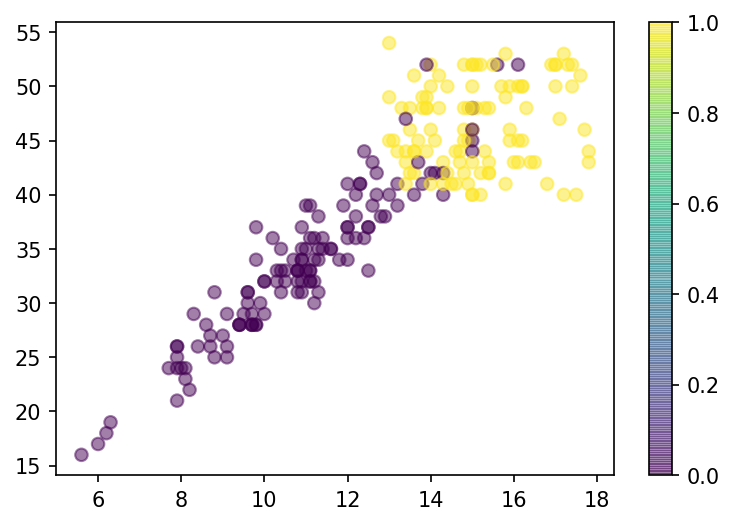

In [30]:
rng=np.random.RandomState(0)
colors=df['classification']
plt.figure(dpi=150)
x=df['hemo']
y=df['pcv']
plt.scatter(x,y,c=colors,alpha=0.5,cmap='viridis')
plt.colorbar()

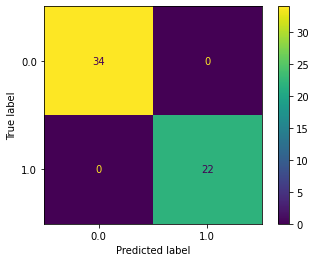

In [31]:
dtree = RandomForestClassifier(n_estimators=1000)
dtree = dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
plot_confusion_matrix(dtree, X_test, y_test)

In [32]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


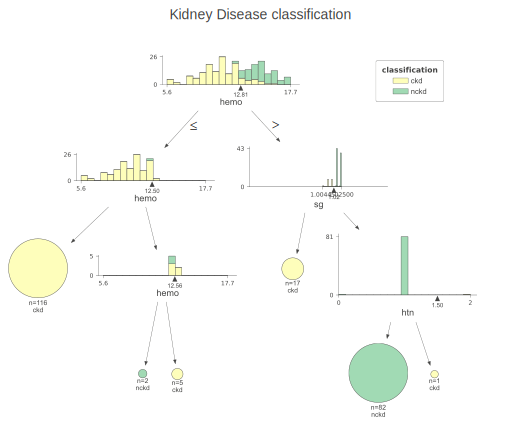

<Figure size 1800x1440 with 0 Axes>

In [33]:
from dtreeviz.trees import *
import graphviz
fig = plt.figure(figsize=(25,20))
clf = tree.DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)
viz = dtreeviz(clf,
               X_train,
               y_train,
               target_name='classification',
               feature_names=X_train.columns,
               title="Kidney Disease classification",
               class_names=['ckd', 'nckd'])
viz